In [135]:
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
from glob import glob
from shutil import copytree, copy

In [2]:
def evaluate(path,title):
    scores={}
    for i in glob(f'{path}/*/*_results.json'):
        with open(i,'r') as f:
            scores[os.path.basename(os.path.dirname(i))]=json.load(f)
    
    R2df=pd.DataFrame.from_dict(scores).loc[['R2_train','R2_test']].astype(float).T
    R2df['diff']=(R2df['R2_train']-R2df['R2_test']).abs()
    meltR2=R2df.reset_index().melt(id_vars='index',value_vars=['R2_train','R2_test']).sort_values(by='value')
    
    topR2=R2df[(R2df['R2_test']>0.75)&(R2df['R2_train']>0.75)].sort_values(['R2_train','R2_test'], ascending=[False,False])
    topmelt=topR2.reset_index().rename(columns={'R2_train':'Train','R2_test':'Test'}).melt(id_vars='index',value_vars=['Train','Test']).sort_values(by='value')
    
    ax=sns.barplot(data=topmelt,x='index',y='value',hue='variable',palette=sns.color_palette('Paired',2))
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_ylabel("R$^{2}$")
    ax.set_xlabel('ENCODER_ANSATZ')
    plt.title(title)
    plt.ylim(0,1)
    legend = plt.legend(loc=4, edgecolor="black")
    legend.get_frame().set_alpha(None)
    legend.get_frame().set_facecolor((1, 1, 1,1))
    plt.tight_layout()
    plt.savefig(f"{path}_metric.png",dpi=300,bbox_inches='tight')
    plt.show()
    
    
    with open(f'{path}_scores.json', 'w') as fp:
        json.dump(scores, fp)

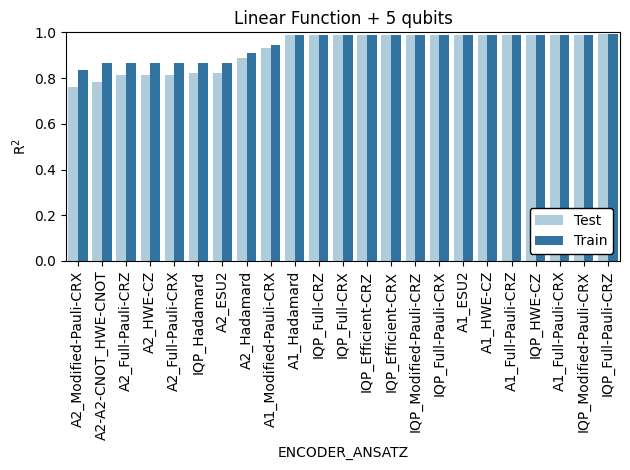

In [3]:
evaluate('./lin5qubits',"Linear Function + 5 qubits")

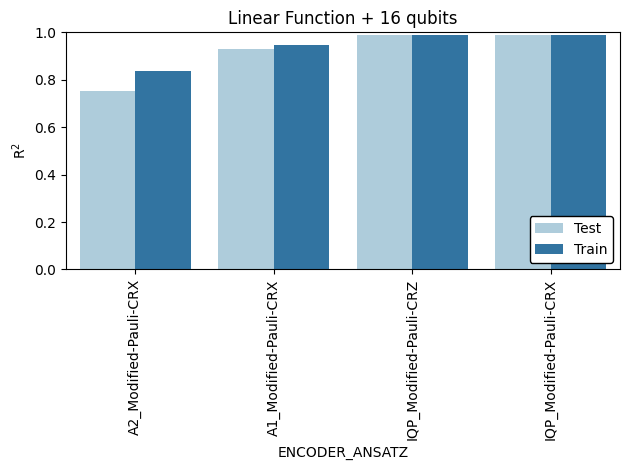

In [4]:
evaluate('./lin16qubit',"Linear Function + 16 qubits")

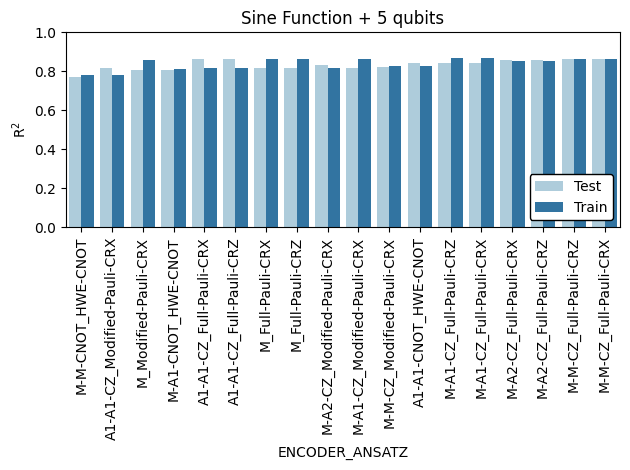

In [5]:
evaluate('./sine5qubits',"Sine Function + 5 qubits")

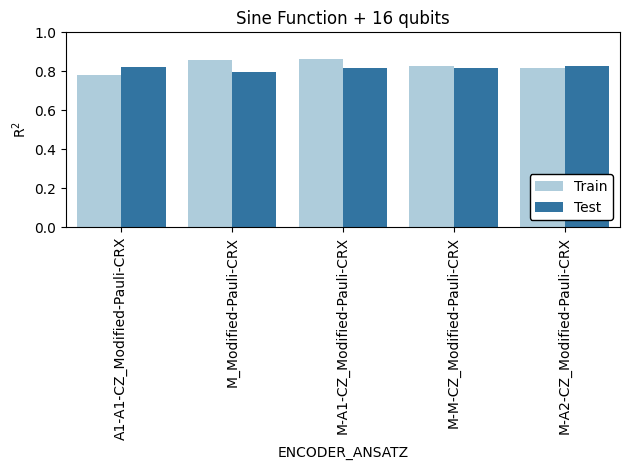

In [6]:
evaluate('./sin16qubit',"Sine Function + 16 qubits")

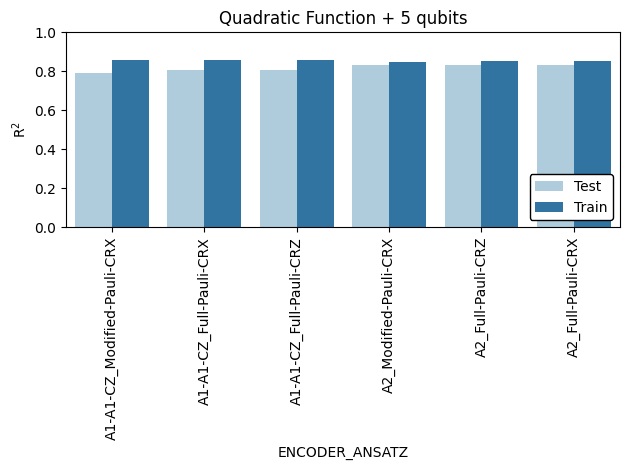

In [7]:
evaluate('./quad5qubits',"Quadratic Function + 5 qubits")

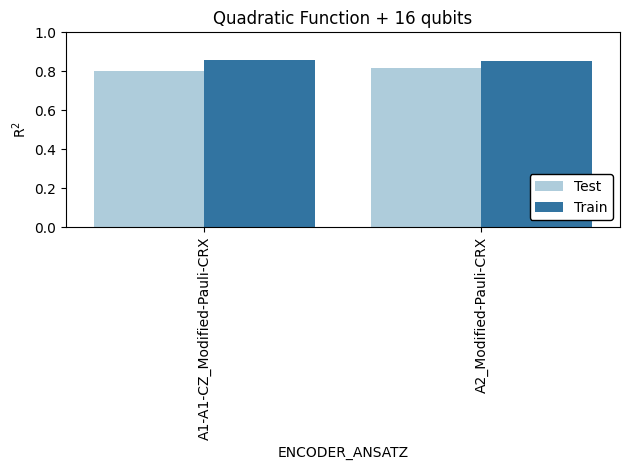

In [8]:
evaluate('./quad16qubit',"Quadratic Function + 16 qubits")

In [116]:
def grab_indexes(fundir):
    scores={}
    for i in glob(f'{fundir}//*/*_results.json'):
        with open(i,'r') as f:
            scores[os.path.basename(os.path.dirname(i))]=json.load(f)
    
    R2df=pd.DataFrame.from_dict(scores).loc[['R2_train','R2_test']].astype(float).T
    # R2df['diff']=(R2df['R2_train']-R2df['R2_test']).abs()
    meltR2=R2df.reset_index().melt(id_vars='index',value_vars=['R2_train','R2_test']).sort_values(by='value')
    
    # Stats
    mean=R2df.T.mean().sort_values()
    median_idx=len(mean)//2
    worst=list(mean.nsmallest(5).index)
    best=list(mean.nlargest(5).index)
    middle=list(mean.to_frame().iloc[median_idx-2:median_idx+3].index)

    return worst+middle+best

In [128]:
dirs=['lin16qubit','sin16qubit','quad16qubit']
params=['RUD','AL']
depth=[3,5]

In [154]:
for ds in dirs:
    for p in params:
        for d in depth:
            newdir=f"{d}{p}_{ds}"
            if os.path.exists(newdir)==False:
                os.mkdir(newdir)
            
            for i in glob(os.path.join(ds,'*')):
                if os.path.isdir(i)==False and os.path.exists(os.path.join(newdir,'quantum'))==False:
                    copy(i,newdir)
                    copytree(os.path.join(ds,'quantum'),os.path.join(newdir,'quantum'))
            # for i in grab_indexes(ds):
            #     copytree(os.path.join(ds,i),os.path.join(newdir,i))
            #     print(i)